In [1]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [65]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [19]:
iris = load_iris()

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [84]:
# загружаем данные в датафрейм и выбираем столбцы sepal_length и sepal_width
data = pd.DataFrame(iris.data, columns=iris.feature_names).filter(['sepal length (cm)', 'sepal width (cm)'])
data_class = iris.target
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [54]:
# разделяем данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.20)

In [55]:
# импортируем LDA-функционал (дискриминантный анализ)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
lda = LinearDiscriminantAnalysis()

In [57]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2])

In [51]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,2
1,1,1
2,1,1
3,2,2
4,2,1
5,2,2
6,0,0
7,0,0
8,1,1
9,1,1


In [59]:
# расчет метрики качества accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9333333333333333

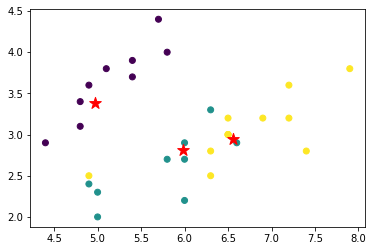

In [75]:
# визуализируем предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# отражаем центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

### Метод К-средних

In [88]:
from sklearn.cluster import KMeans

In [99]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# обучаем модель
clusters = kmeans.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

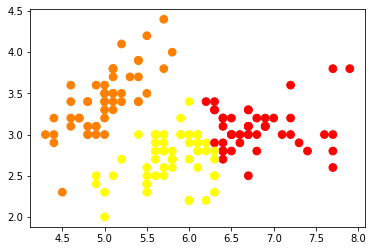

In [100]:
# строим визуализацию полученной кластеризации
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

In [93]:
# график локтя

# список для инерции
k_inertia = []
# диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

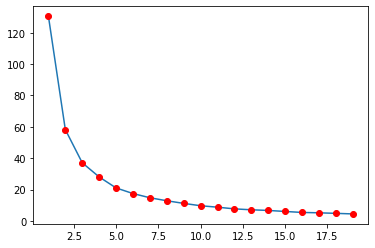

In [94]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#### Исходя из графика локтя видно, что оптимальным является 3 или 4 класса. Пробуя делить на 2, 3, 4 класса, мне показалось, что 3 является самым оптимальным вариантом.